# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [29]:
df = pd.read_csv (r'C:\Users\Karim\Desktop\Classified Data')

In [30]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [31]:
scaler = StandardScaler()
#print(scaler.fit(df))
#print(scaler.mean_)
#print(scaler.transform(df))

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [32]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [33]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [34]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [50]:
pred = knn.predict(X_test)
print(y_test)

545    0
298    0
109    0
837    0
194    0
605    0
246    1
693    1
802    0
406    1
824    1
977    0
742    0
341    1
601    0
319    1
121    1
299    1
32     1
269    1
887    0
668    1
820    0
754    1
731    1
225    0
569    0
56     0
408    1
734    0
      ..
660    1
120    1
679    1
466    1
173    0
293    0
959    0
41     0
63     0
164    0
656    0
131    0
54     1
458    1
308    1
818    1
782    1
155    0
175    1
816    1
781    1
547    1
261    0
265    0
66     1
560    1
763    1
572    0
475    0
160    0
Name: TARGET CLASS, Length: 500, dtype: int64


### Evaluation of classification quality using Confusion Matrix

In [25]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [64]:
print(metrics.confusion_matrix(y_test,pred))



[[232  18]
 [ 26 224]]


***Print Misclassification error rate***

In [65]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


[[232  18]
 [ 26 224]]


In [66]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, pred))

0.912
0.912


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

Text(0, 0.5, 'Error Rate')

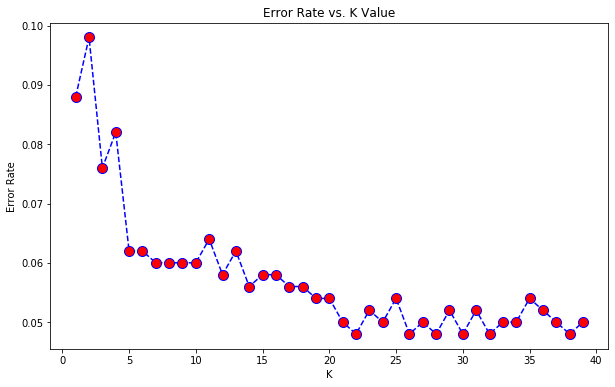

In [68]:
error_rate = []

# Will take some time
for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
         linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [70]:
# WITH K = 20 AS THE ERROR VALUE AFTER 20 K REMAINS IN THE RANGE 0.045-0.055
knn = KNeighborsClassifier(n_neighbors = 20)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 15')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))


WITH K = 1


[[232  18]
 [ 26 224]]


              precision    recall  f1-score   support

           0       0.90      0.93      0.91       250
           1       0.93      0.90      0.91       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

WITH K = 15


[[238  12]
 [ 15 235]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       250
           1       0.95      0.94      0.95       250

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

